<a href="https://colab.research.google.com/github/Jayvish80/Paisa-Bazaar-EDA/blob/main/Paisabazaar_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Exploratory Data Analysis of PaisaBazaar**



# **Project Summary -**

The PaisaBazaar project is centered around analyzing financial and credit-related data of customers to understand their financial behaviors, identify patterns in creditworthiness, and provide business strategies for better decision-making. The dataset was initially processed, cleaned, and enhanced through data wrangling and feature engineering before moving to visualization and insights generation.

**Data Preparation and Cleaning :**

The raw dataset contained several unnecessary or sensitive fields such as ID, Customer ID, Name, and SSN, which were removed to ensure both relevance and privacy. Data types were corrected for numerical columns like Age, Number of Bank Accounts, and Credit Inquiries, and all numerical values were rounded for consistency. These steps ensured accuracy in further analysis.

**Feature Engineering :**
To enrich the dataset, several new variables were introduced that provided deeper financial insights:

1. **Debt-to-Income Ratio –** calculated by dividing outstanding debt by annual income, giving a clear indicator of financial risk.calculated by dividing outstanding debt by annual income, giving a clear indicator of financial risk.  

2.  **Credit Card Utilization Score –** derived from utilization ratio and the number of credit cards, highlighting customer credit dependence.

3.  **Credit Mix Score –** mapped categorical credit mix (“Bad,” “Standard,” “Good”) into numerical values for modeling ease.

4.   **Payment Delay Score –** generated by multiplying delayed payment counts with the number of days overdue, offering insight into repayment discipline.

**Business Implications and Recommendations :**

The project’s findings directly translate into actionable strategies for PaisaBazaar and similar financial platforms:

*   **Enhanced Credit Scoring Models :** Incorporating engineered features such as debt-to-income ratio and payment delay scores can strengthen predictive accuracy and reduce default risk.
*   **Targeted Loan Offers:** Understanding customer demographics, income brackets, and credit behavior allows for customized loan products and tailored marketing.

*   **Financial Literacy Programs:** Since high utilization and delayed payments were common in some customer groups, promoting awareness about healthy credit usage can lead to more sustainable financial behavior.
*   **Risk-Based Interest Rates:** Customers with high risk indicators, such as excessive debt or payment delays, could be offered loans at adjusted interest rates, balancing business profitability with risk management.
*   **Proactive Credit Monitoring:** Continuous tracking of key indicators can help detect early warning signs of financial stress and enable timely intervention.


# **GitHub Link -**

https://github.com/Jayvish80/Paisa-Bazaar-EDA.git

# **Problem Statement**


*   PaisaBazaar, as a leading financial marketplace, relies heavily on accurate credit risk assessment to recommend suitable loan and credit products.
However, raw customer data often contains inconsistencies, irrelevant identifiers, and lacks derived features that truly capture financial behavior.
Without proper cleaning, transformation, and feature engineering, predictive models may become biased, underperform, or misclassify customers—leading to
poor credit decisions, increased default rates, and loss of customer trust.

*   The challenge is to process and enhance the dataset in a way that reveals meaningful patterns of income, debt, utilization, and repayment discipline.
This will allow the business to better distinguish low-risk from high-risk customers, design targeted loan offers, and improve portfolio quality while
minimizing defaults.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [61]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report




import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/dataset-2.csv')

### Dataset First View

In [64]:
# Dataset First Look
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Dataset Rows & Columns count

In [65]:
# Dataset Rows & Columns count
df.shape

(100000, 28)

### Dataset Information

In [66]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [67]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [68]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


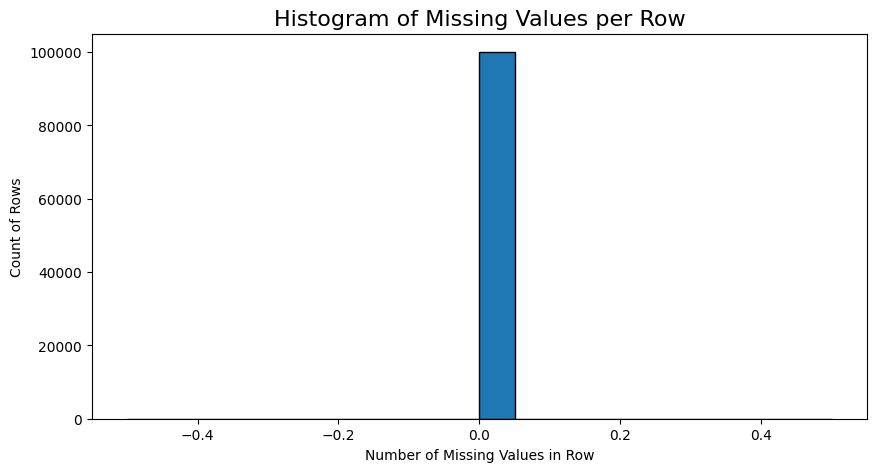

In [69]:
# Visualizing the missing values

missing_counts = df.isnull().sum(axis=1)
plt.figure(figsize=(10,5))
plt.hist(missing_counts, bins=20, edgecolor='black')
plt.title("Histogram of Missing Values per Row", fontsize=16)
plt.xlabel("Number of Missing Values in Row")
plt.ylabel("Count of Rows")
plt.show()


### What did you know about your dataset?

Your dataset looks like a credit score dataset that contains information about customers, their financial background, and their repayment behaviors. Each customer is identified by a Customer_ID, and records are repeated across different months, which means the data is time-based and tracks how a customer’s financial situation changes over time.

The dataset has around 28 columns. These columns cover different aspects such as:

*   **Personal details** like Name, Age, and SSN.

*   **Financial details** like Annual Income, Monthly Inhand Salary, Number of Bank Accounts, Number of Loans, Outstanding Debt, and Monthly Balance

*   **Credit behavior** such as Delay from Due Date, Number of Delayed Payments, Credit Utilization Ratio, and Credit History Age.

*   **Target column** called Credit_Score, which classifies customers into categories like Good, Standard, or Poor.

*   **Payment behavior** including whether the minimum amount was paid and the type of payment behavior (e.g., high spending, small or large value payments).

From the structure, this dataset is mainly designed to predict a customer’s credit score based on their income, spending habits, and repayment patterns. Some fields such as **Name** or **SSN** may not be directly useful for prediction but can help with identification. Since the same customer appears in multiple months, this data could also be used to analyze financial trends over time.




## ***2. Understanding Your Variables***

In [70]:
# Dataset Columns
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [71]:
# Dataset Describe
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Variables Description

1.   **ID** – Unique identifier for each record in the dataset.

1.   **Customer_ID** – Identifier for each customer (same customer appears in multiple months)

1.   **Month** – Indicates the month number for which the record belongs (time-series element).

1.   **Name** – Customer’s name.

1.   **Age** – Age of the customer.

1.   **SSN** – Social Security Number or identification number

1.  ** Occupation** – Profession of the customer (e.g., Scientist, Engineer, Teacher, etc.).

1.  **Annual_Income** – Yearly income of the customer.

1.   **Monthly_Inhand_Salary** – Monthly salary available after deductions.

1.   **Num_Bank_Accounts** – Total number of bank accounts the customer holds.

2.   **Num_Credit_Card** – Total number of credit cards the customer owns.

2.   Interest_Rate – Average interest rate on the customer’s borrowings.

2.   Num_of_Loan – Number of loans taken by the customer.

2.   **Delay_from_due_date** – Average delay in payments beyond the due date (in days).

2.   **Num_of_Delayed_Payment** – Total number of delayed payments made by the customer

2.   **Changed_Credit_Limit** – Indicator showing if the customer’s credit limit was recently changed.

2.  **Num_Credit_Inquiries** – Number of times the customer’s credit history was checked by financial institutions.

2.  **Credit_Mix** – Type of credit mix (e.g., Good, Standard, or Bad mix of credit sources).

2.  **Outstanding_Debt** – Amount of unpaid debt.

2. Credit_Utilization_Ratio – Ratio of credit used to total available credit.

2. Credit_History_Age – Length of the customer’s credit history (in months).

2. Payment_of_Min_Amount – Whether the customer pays only the minimum due amount (Yes/No).

2. Total_EMI_per_month – Total monthly EMI (Equated Monthly Installment) obligations.

2. Amount_invested_monthly – Monthly investments made by the customer.

2. Payment_Behaviour – Payment pattern (e.g., high spend, low spend, small or large value payments).

2. Monthly_Balance – Amount left in hand after all expenses in a month.

2. Credit_Score – The target variable indicating customer’s credit score category (Good, Standard, Poor).

### Check Unique Values for each variable.

In [72]:
# Check Unique Values for each variable.
df.nunique()

,0
ID,100000
Customer_ID,12500
Month,8
Name,10128
Age,43
SSN,12500
Occupation,15
Annual_Income,12488
Monthly_Inhand_Salary,13241
Num_Bank_Accounts,12


## 3. ***Data Wrangling***

### Data Wrangling Code

In [73]:
# Write your code to make your dataset analysis ready.

df_copy = df.copy()

#drop unnecessary columns
# drop_columns = ['ID', 'Customer_ID', 'Name', 'SSN']
# df.drop(columns = drop_columns, inplace = True)

#convert data types
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype('int64')
df['Age'] = df['Age'].astype('int64')
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype('int64')

#round numerical values
df = df.round(2)

#Calculate Debt-to-Income Ratio
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']

# Calculate Payment Delay Score
df['Payment_Delay_Score'] = df['Num_of_Delayed_Payment'] * df['Delay_from_due_date']

### What all manipulations have you done and insights you found?

### Data Manipulations :
1. Removed Irrelevant Columns
2. Data type conversion
3. Rounded Numerical Values
4. Feature Engineering

### Insights found
- better data quality
- Impact of Debt to Income Ratio
- Credit Utillisation and Risk
- Delayed Payment Behaviour

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Distribution of Credit Scores

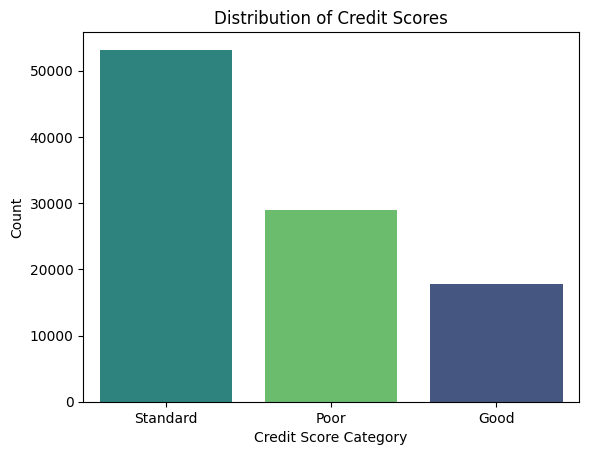

In [74]:
#create count plot for credit score distribution
sns.countplot(x = df['Credit_Score'], hue = df['Credit_Score'], palette = 'viridis', order = df['Credit_Score'].value_counts().index)
#Set labels and title
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
#show plot
plt.show()

##### 1. Why did you pick the specific chart?

 A count plot is ideal for categorical variables as it visually represents the frequency distribution of different credit scores.

##### 2. What is/are the insight(s) found from the chart?



*   The chart highlights that one credit score category is significantly more frequent than others, indicating a class imbalance in the dataset.
*   This imbalance suggests that the dataset is skewed toward "Standard" category, which could impact predictive modelling.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Understanding the distribution is crucial for predictive modelling.

*   The imbalance may lead to biased model predictions, which could negatively impact risk assesment for loans.

*   Addresing this imbalance using techiniques like resampling, or class weighting can improve credit risk management and model fairness.




#### Chart - 2: Distribution of Age

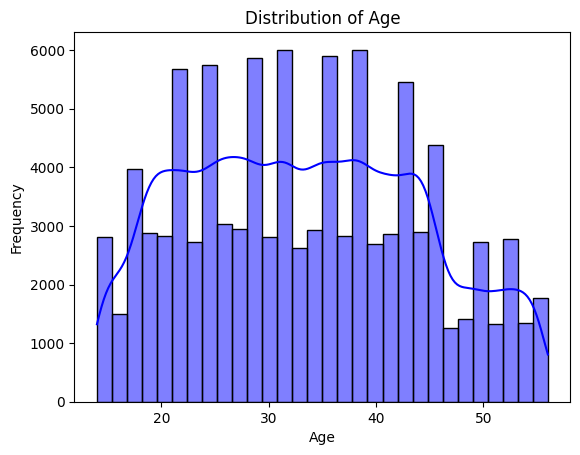

In [75]:
#create histogram for Age distribution
sns.histplot(df['Age'], bins = 30, kde = True, color = 'blue')

#set labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#show plot
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for continuous numerical variables like Age as it shows the distribution of values across intervals. The addition of a KDE curve helps in understanding the overall shape of the distribution and identifying patterns such as skewness or clustering.

##### 2. What is/are the insight(s) found from the chart?

The distribution of Age shows that most customers fall between their mid-20s and early-40s, indicating a concentration of financially active individuals in this range. Fewer customers are seen at the extreme ends (below 20 and above 50), suggesting that very young and older individuals are less represented in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Understanding the distribution of Age is essential for predictive modeling in credit risk analysis.
*   The chart shows that most customers are concentrated between their mid-20s and early-40s, while very young and older age groups are underrepresented. This imbalance could bias model predictions, leading to unfair or inaccurate risk assessments for the minority age groups.

*   Addressing this imbalance through techniques such as resampling, stratification, or applying class weights can enhance model fairness, improve credit risk evaluation, and ensure better business decisions.




#### Chart - 3 : Annual Income Distribution

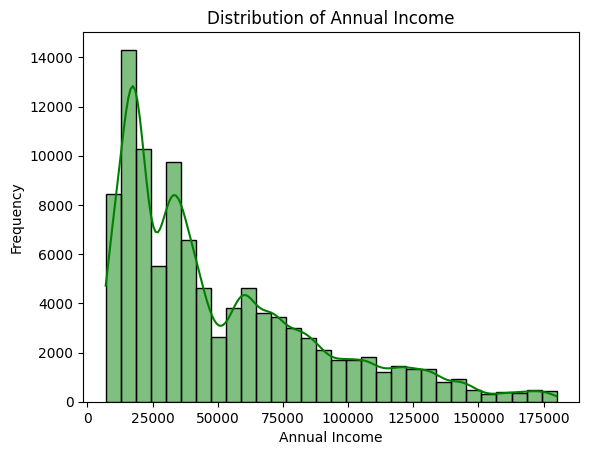

In [76]:
#create histogram for Annual Income Distribution

sns.histplot(df['Annual_Income'], bins = 30, kde = True, color = 'green')

#set labels and title
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

#show plot
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for analyzing continuous variables like Annual Income because it effectively shows the frequency distribution across different income ranges. It helps to identify the skewness, spread, and concentration of values, which are important for understanding customer segments and their financial capacity.

##### 2. What is/are the insight(s) found from the chart?



*   The chart shows that most customers have an annual income concentrated in the lower ranges (between 10,000 and 40,000), while only a small portion of customers earn very high incomes above 100,000. The distribution is right-skewed, highlighting income inequality among customers.

*   This indicates that the majority of the customer base belongs to lower or middle-income groups, while high-income individuals are fewer but could represent premium segments.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the insights will help in creating a positive business impact. From the chart, it is clear that the majority of customers belong to the lower and middle-income range. This information can guide businesses to design affordable products, flexible repayment plans, and financial services that are more aligned with the needs of this segment. At the same time, the small proportion of high-income customers can be targeted with premium or investment-oriented products, which may improve overall profitability.

*   On the other hand, there is also a risk of negative growth. Since a large share of the customer base comes from lower income groups, there could be a higher possibility of defaults if loans are extended without proper checks. If this imbalance is not addressed through strong risk management strategies, it may increase credit risk and affect the company’s growth in the long run.



#### Chart - 4 : Distribution of Credit Utilization Ratio

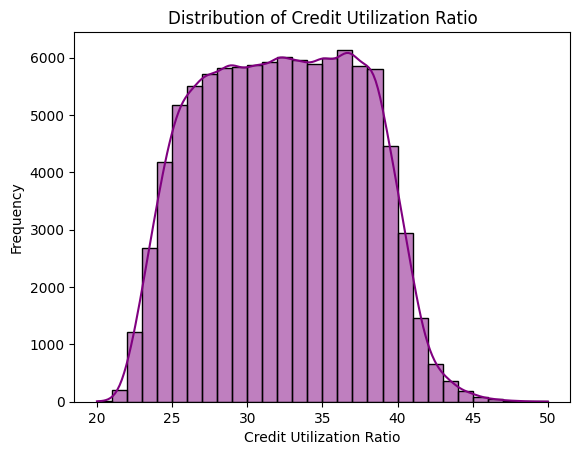

In [77]:
# Chart 4 - Credit Histogram for credit Utillization ratio distribution
sns.histplot(df['Credit_Utilization_Ratio'], bins = 30, kde = True, color = 'purple')

#set labels and title
plt.title('Distribution of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')

#show plot
plt.show()

##### 1. Why did you pick the specific chart?

I picked a histogram because it is the best way to show the distribution pattern of the Credit Utilization Ratio. It clearly highlights how most customers are spread across different utilization levels and helps in identifying whether the usage is balanced, high, or risky.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most customers have a credit utilization ratio between 25% and 40%, with very few using below 20% or above 45%. This suggests that customers generally use a moderate portion of their available credit, which may indicate responsible credit behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the insights can create a positive business impact because knowing that most customers keep their credit utilization ratio in the moderate range (25–40%) indicates lower default risk. This helps in designing better credit policies, offering personalized credit limits, and promoting responsible borrowing.
*   However, there is also a risk of negative growth if a subset of customers consistently stays near the higher utilization levels (above 40%), as this could signal financial stress. If not managed, it may increase defaults and negatively affect business growth.



#### Chart - 5: Number of credit cards distribution

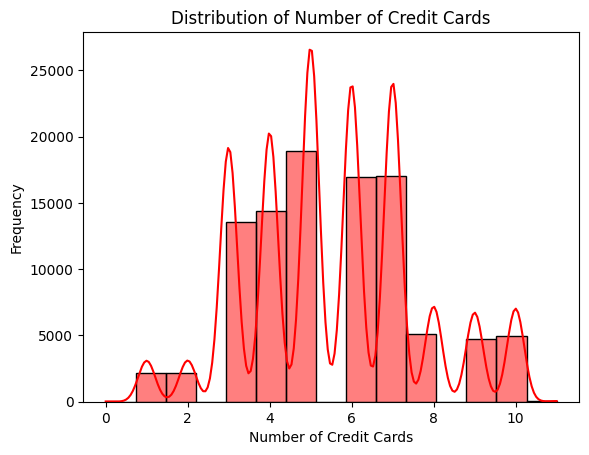

In [78]:
#create histogram for number of credit cards distribution
sns.histplot(df['Num_Credit_Card'], bins = 15, kde = True, color = 'red')

#set labels and title
plt.title('Distribution of Number of Credit Cards')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Frequency')

#show plot
plt.show()

##### 1. Why did you pick the specific chart?

I picked the histogram because it clearly shows the frequency distribution of the number of credit cards held by customers. It helps to quickly identify the most common ranges, spot outliers, and understand overall patterns in customer credit card ownership.

##### 2. What is/are the insight(s) found from the chart?



*   Most customers own 3 to 6 credit cards, showing this is the most common range of card usage.

*   Very few customers have 0–1 cards or more than 8 cards, making them outliers compared to the majority.


*   The distribution highlights that customers generally maintain a moderate number of credit cards, suggesting balanced credit usage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the insights can help in creating a positive business impact because the chart shows that most customers hold between 3 to 6 credit cards, which indicates active credit usage and opportunities for cross-selling financial products such as loans, insurance, or premium cards. This pattern helps banks and institutions design targeted offers for customers in this range to increase engagement and revenue.


*   On the other hand, there could be a risk of negative growth for customers holding too many credit cards (8 or more). High card ownership may increase chances of over-leveraging, missed payments, and defaults. If not monitored, this can negatively affect profitability due to higher credit risk exposure.



#### Chart - 6: Distribution of Outstanding Debt

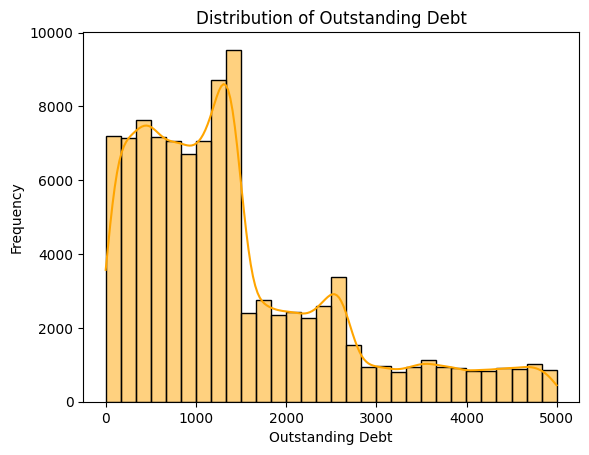

In [79]:
# Distribution of Outstanding Debt
sns.histplot(df['Outstanding_Debt'], bins=30, kde=True, color='orange')
plt.title('Distribution of Outstanding Debt')
plt.xlabel('Outstanding Debt')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a histogram with KDE because it is the most effective way to understand the distribution of a continuous variable like Outstanding Debt.

*   It clearly shows how debt values are spread across customers.

*   The bars highlight frequency ranges, while the KDE curve smooths the trend to identify peaks.

*  This combination makes it easier to detect patterns such as concentration, skewness, and outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

From the chart, the key **insights** are:

*   Most customers have outstanding debt below 2000, with a clear concentration between 500–1500.
*   Very few customers carry extremely high debts above 4000, showing that heavy debt is less common.

*   The distribution is right-skewed, meaning a smaller portion of customers holds much higher debt compared to the majority.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the gained insights can create a positive business impact because the distribution shows that most customers have manageable debt levels, enabling businesses to design safer credit products, targeted repayment plans, and improved risk-based customer segmentation.

*   However, there are also insights that may lead to negative growth. A notable portion of customers holds very high outstanding debt, which increases the risk of default. If this segment is not carefully managed with stricter credit checks or debt restructuring strategies, it could lead to higher losses and negatively affect overall profitability.



#### Chart - 7: Distribution of Debt-to-Income Ratio

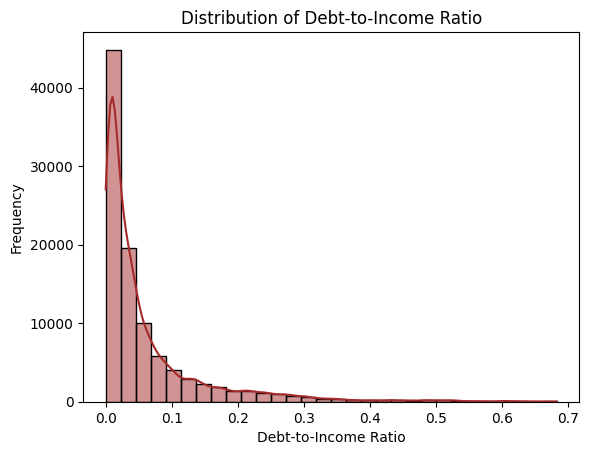

In [80]:
# Distribution of Debt-to-Income Ratio
sns.histplot(df['Debt_to_Income_Ratio'], bins=30, kde=True, color='brown')
plt.title('Distribution of Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart because a histogram is the most effective way to analyze a continuous variable like the Debt-to-Income Ratio. It clearly shows the distribution pattern, highlighting where most customers fall (low ratios) and identifying the tail (customers with very high ratios).

This helps in:
*   Understanding the overall financial health of customers.
*   Detecting outliers with unusually high ratios that may indicate higher credit risk.
*  Supporting risk assessment and credit policy design by showing how debt compares to income across the population.

##### 2. What is/are the insight(s) found from the chart?


*  ** Most customers have a very low debt-to-income ratio (below 0.1):**
This indicates that the majority of borrowers are financially healthy, with manageable debt compared to their income.

*  ** The distribution is highly right-skewed:**
A small portion of customers has much higher ratios (above 0.3), which signals potential credit risk since their debt levels are disproportionately high relative to income.

*   **Clear separation between low-risk and high-risk groups:**
This allows businesses to segment customers more effectively — most fall into a low-risk category, while the tail end highlights high-risk borrowers who need stricter credit evaluation.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*  Yes, the gained insights will help create a positive business impact because the distribution shows that most customers maintain a low debt-to-income ratio, indicating financial stability and lower default risk. This allows the business to safely expand lending, design better credit products, and target the majority of customers with confidence.

*   However, some insights may lead to negative growth. A small portion of customers shows very high debt-to-income ratios, which signals over-leveraging and higher chances of default. If this risk segment is not managed through stricter credit checks or repayment monitoring, it can increase non-performing loans and hurt profitability.

#### Chart - 8: Distribution of Number of Bank Accounts

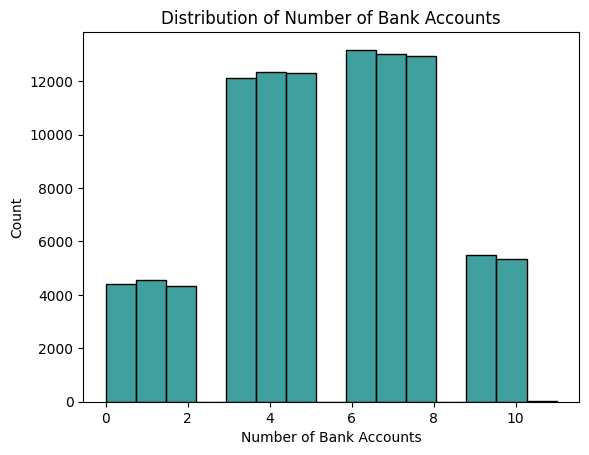

In [81]:
# Distribution of Number of Bank Accounts
sns.histplot(df['Num_Bank_Accounts'], bins=15, kde=False, color='teal')
plt.title('Distribution of Number of Bank Accounts')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart because a histogram is the best way to visualize the distribution of the Number of Bank Accounts, which is a discrete numerical variable. It clearly shows how customers are spread across different account ranges and helps identify the most common patterns as well as outliers. This makes it easier to understand customer banking behavior and design strategies based on account ownership trends.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are:


*   Most customers hold between 4 to 8 bank accounts, showing a clear concentration in the mid-range.

*   Very few customers have either 0–2 accounts or more than 9 accounts, indicating that such cases are less common.
*   The distribution suggests that maintaining multiple bank accounts is a common trend, which could reflect diverse financial needs or usage of different banks for savings, loans, or credit facilities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the gained insights will help create a positive business impact because knowing that most customers maintain 4–8 bank accounts allows businesses to design targeted financial products such as bundled offers, cross-selling opportunities, or loyalty programs for multi-account holders. This can improve customer engagement and revenue generation.

*   However, there are also insights that may lead to negative growth. Customers with either too few accounts (0–1) may indicate limited financial activity, reducing opportunities for cross-selling, while customers with too many accounts (9–10) may suggest financial strain, over-diversification, or higher risk of default. If not monitored, this segment could negatively affect profitability and loan repayment performance.


#### Chart - 9 : Annual Income vc Credit Score

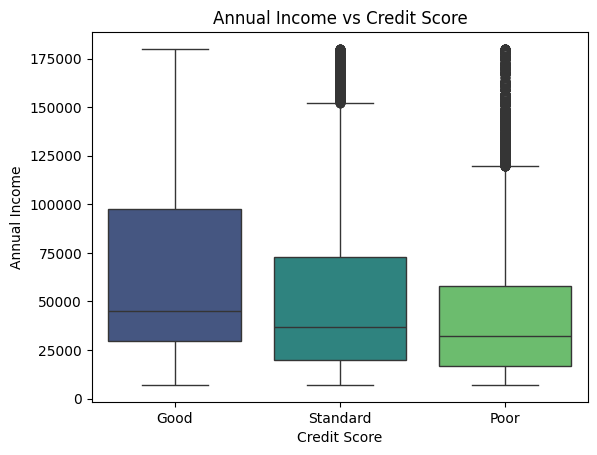

In [82]:
#create boxplot for annual income across different credit score categories
sns.boxplot(x= 'Credit_Score', y = "Annual_Income", data = df, palette = 'viridis')

#set label and title
plt.title('Annual Income vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')

#show plot
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart because a boxplot is the best way to compare the distribution of annual income across different credit score categories. It clearly shows the median, spread, and presence of outliers for each group. This helps to understand whether higher income levels are associated with better credit scores and highlights variations that might not be visible in other chart types like bar or line charts.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that individuals with a good credit score generally have higher annual incomes compared to those with standard or poor credit scores. The median income decreases as credit score quality declines. Additionally, people with poor credit scores display more variability and outliers, suggesting that even some higher-income individuals can struggle with maintaining good credit.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the gained insights will help create a positive business impact. The chart clearly shows that customers with higher annual income tend to have better credit scores. This means businesses, especially in banking and lending, can design targeted products for higher-income groups who are more likely to repay loans on time, reducing credit risk.
*   On the other hand, there are also insights that point to negative growth. The presence of some higher-income individuals with poor credit scores indicates that income alone does not guarantee financial discipline. If businesses rely only on income as a deciding factor, they may face defaults from such customers. Therefore, it is important to combine income data with payment history and credit behavior for accurate risk assessment.



#### Chart - 10: Payment Delay Score vs Credit Score

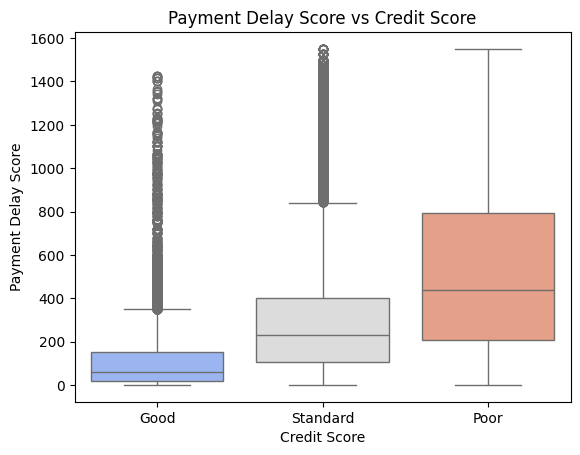

In [83]:
# Payment Delay Score vs Credit Score
sns.boxplot(x='Credit_Score', y='Payment_Delay_Score', data=df, palette='coolwarm')
plt.title('Payment Delay Score vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Payment Delay Score')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart (a boxplot) because it is the best way to compare the distribution and variability of Payment Delay Scores across different Credit Score categories (Good, Standard, Poor).

A boxplot was chosen because:
*   It makes it easy to see how payment behavior worsens as credit score decreases.
*   It shows the median, quartiles, and spread of delay scores for each credit score group.
*   It helps identify outliers (customers with extreme delays).

##### 2. What is/are the insight(s) found from the chart?

From the chart "Payment Delay Score vs Credit Score", the insights found are:
*   Poor Credit Score customers → Have the highest payment delay scores and the widest distribution. This clearly indicates a strong tendency toward frequent and significant delays.
*   Standard Credit Score customers → Show a wider spread of delay scores, with more variation and several outliers. This means they are moderately reliable but still prone to late payments compared to good credit holders.
*   Good Credit Score customers → Have the lowest payment delay scores, with very few delays and a compact distribution. This shows they are the most reliable in making timely payments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights will help create a positive business impact as they clearly show that customers with good credit scores have the lowest payment delays. This allows businesses to focus on such customers for faster approvals, lower risk, and higher profitability. On the other hand, the chart also highlights a negative growth risk — customers with poor credit scores tend to have higher payment delays, which can increase default rates, disrupt cash flow, and raise collection costs. This makes them riskier for the business and can directly harm growth if not managed properly.

#### Chart - 11: Countplot of Credit Mix Categories

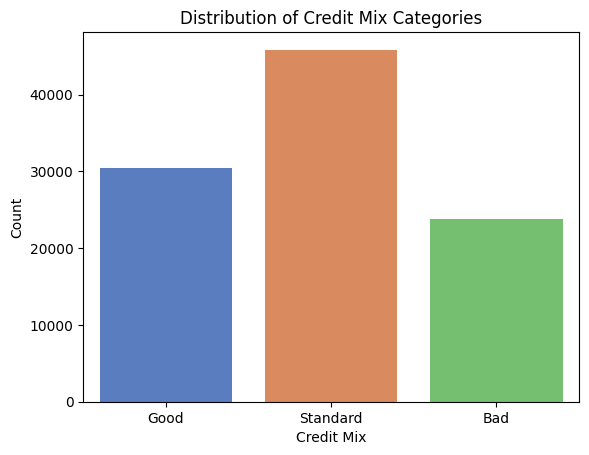

In [84]:
# Countplot of Credit Mix Categories
sns.countplot(x='Credit_Mix', data=df, palette='muted')
plt.title('Distribution of Credit Mix Categories')
plt.xlabel('Credit Mix')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart because a countplot is the most effective way to show the frequency distribution of categorical variables like Credit Mix. It clearly highlights how many customers fall into each category (Good, Standard, Bad) and makes it easy to compare the proportions at a glance. This helps in identifying which credit mix is most common and where potential risks or opportunities for the business may exist.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that the majority of customers fall into the Standard credit mix category, followed by the Good credit mix, while the Bad credit mix has the lowest count. This indicates that most customers maintain an average credit profile, a considerable number manage their credit well, and a smaller portion struggle with poor credit management.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the gained insights will help in creating a positive business impact. The chart shows that the majority of customers fall into the Standard credit mix category, followed by Good, and the least in the Bad category.
*   On the other hand, there are also insights that can lead to negative growth. The presence of a significant number of customers in the Bad credit mix category highlights a potential risk segment. Extending credit or high-value loans to this group could increase default rates, leading to financial losses. Additionally, since the "Standard" category is the largest, if not managed properly, these users might slip into the bad category, which would negatively impact business growth.



#### Chart - 12: Age vs Annual Income (colored by Credit Score)

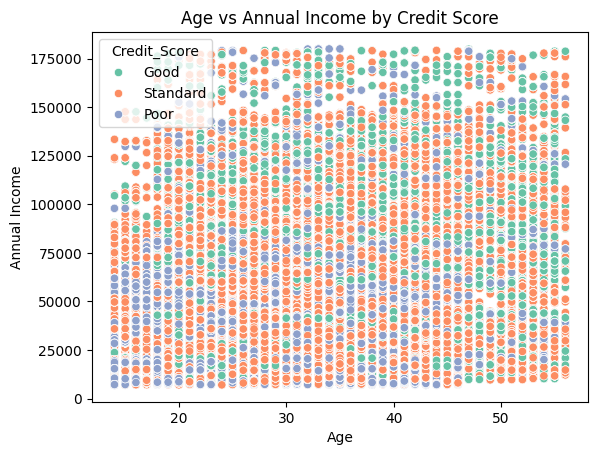

In [85]:
# Age vs Annual Income (colored by Credit Score)
sns.scatterplot(x='Age', y='Annual_Income', hue='Credit_Score', data=df, palette='Set2')
plt.title('Age vs Annual Income by Credit Score')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart (Age vs Annual Income by Credit Score) because it helps to understand how income levels vary across different age groups and how this variation is linked with credit scores. By plotting age on the x-axis and annual income on the y-axis, and coloring by credit score, the chart clearly shows whether higher income and age are associated with better credit performance.

This chart was chosen because:


*   It allows us to see income growth trends across age groups.
*   It highlights how creditworthiness (good, standard, poor scores) is distributed across income and age levels.

*   It gives valuable insights for financial institutions in identifying target age groups with higher repayment capacity and lower risk.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the Age vs Annual Income by Credit Score chart are:

*   Income tends to increase with age – Younger individuals (early 20s) generally have lower incomes, while people in their 30s, 40s, and 50s show higher earnings.
*  Good credit scores are more common at higher income levels – Individuals with higher annual income are more likely to have a good credit score, suggesting strong financial stability.
*  Middle-aged groups (30–45 years) show a balance – This segment tends to have stable incomes and a higher proportion of standard to good credit scores.
*  Poor credit scores are scattered across all age groups – Even people with higher income sometimes have poor credit scores, which may indicate issues like overspending or poor repayment behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the gained insights can help in creating a positive business impact. By observing that higher annual income is often associated with good credit scores, businesses (especially in banking and lending) can target high-income individuals with premium credit products, loans, or investment opportunities. This helps in reducing default risks and ensures better financial returns. Additionally, identifying that middle-aged individuals (30–45 years) usually show stable income and balanced credit scores allows companies to design customized financial products for this segment.
*   However, there are also insights that may lead to negative growth. The chart shows that some individuals with high income still fall into the poor credit score category. This suggests that income alone is not a guarantee of financial reliability. Lending to such customers could increase the risk of defaults, causing financial losses. Similarly, younger age groups with low income and poor credit scores might not be ideal targets for high-value financial products, as this could negatively impact repayment rates.



#### Chart - 13: Credit Utilization Ratio vs Outstanding Debt

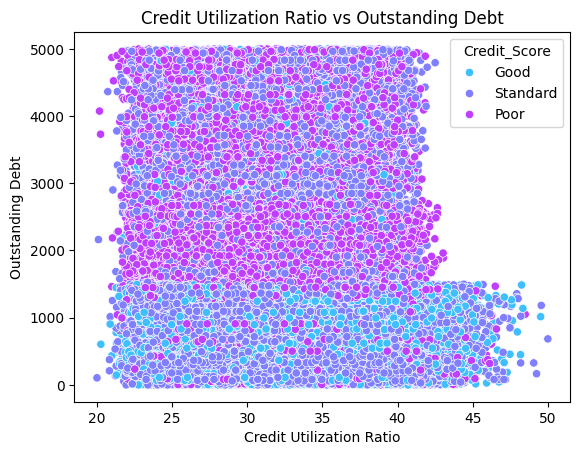

In [86]:
# Credit Utilization Ratio vs Outstanding Debt
sns.scatterplot(x='Credit_Utilization_Ratio', y='Outstanding_Debt', hue='Credit_Score', data=df, palette='cool')
plt.title('Credit Utilization Ratio vs Outstanding Debt')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Outstanding Debt')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart because a scatter plot is ideal for examining the relationship between two continuous variables — here, Credit Utilization Ratio and Outstanding Debt. By also adding color coding for Credit Score, the chart makes it easy to see how debt levels and utilization patterns differ across customers with good, standard, and poor credit scores. This helps in identifying risk groups and understanding how utilization behavior impacts overall creditworthiness.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are:
*  Standard credit score customers fall in between, spread across mid-level utilization and debt.
*  Good credit score customers are more common at lower debt and moderate utilization levels, reflecting better financial discipline.
*  Poor credit score customers are mostly concentrated at high utilization and high debt levels, which indicates higher default risk.
*  Customers with higher credit utilization ratios tend to have higher outstanding debt, showing a direct relationship between the two.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


*   Yes, the gained insights will help create a positive business impact because the chart shows a clear relationship between credit utilization, outstanding debt, and credit scores. Businesses can use this to segment customers more effectively, design personalized credit limits, and promote responsible borrowing, which can improve repayment rates and reduce overall risk exposure.
*   However, there are also insights that may lead to negative growth. Customers with high utilization ratios and high outstanding debt are largely associated with poor credit scores, indicating a higher probability of default. If lending policies do not account for this risk and credit is extended to such customers without stricter checks, it could increase non-performing loans and negatively affect profitability.

#### Chart - 14: Correlation Heatmap

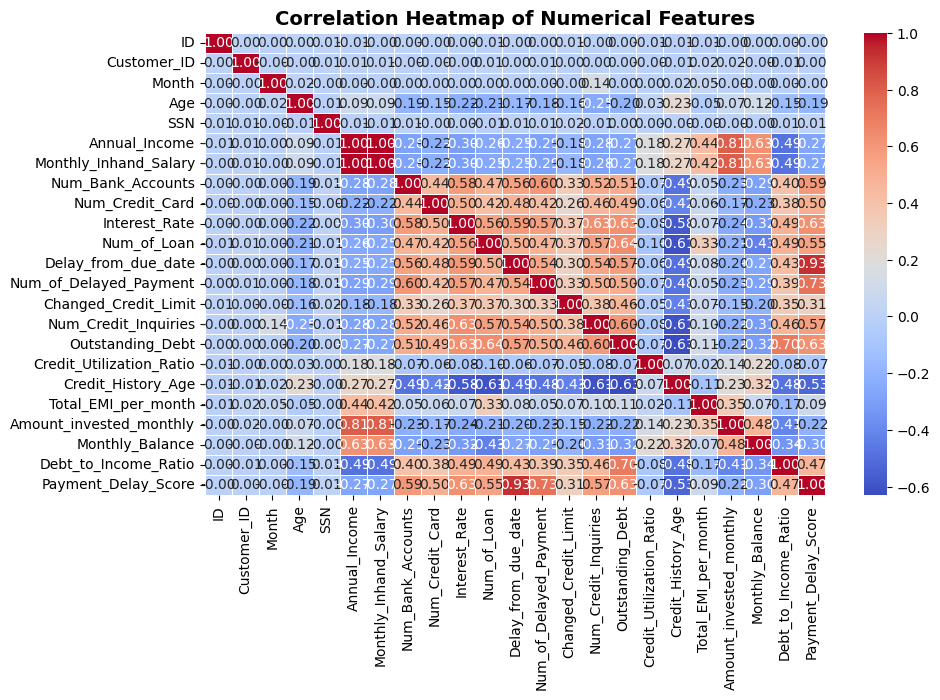

In [87]:
# Correlation Heatmap visualization code
# Correlation Heatmap
plt.figure(figsize=(10,6))
# Drop non-numeric columns for correlation calculation
numeric_df = df.drop(columns=['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart because I wanted to clearly understand how different financial variables are related to each other. A correlation heatmap makes it easy to see both strong positive and negative relationships at a glance, without going through detailed calculations. By using it, I can quickly identify which factors influence each other the most (like Outstanding Debt and Debt-to-Income Ratio), which helps in feature selection for modeling and in making better business decisions.

##### 2. What is/are the insight(s) found from the chart?

The insights from the correlation heatmap are:


1.  Outstanding Debt and Debt-to-Income Ratio show a strong positive correlation, meaning higher debt directly increases the burden relative to income.

1. Monthly Balance and Amount Invested Monthly are highly correlated, suggesting customers with higher balances tend to invest more.  
2.   Credit Utilization Ratio is positively correlated with Outstanding Debt, indicating that customers who use more of their available credit usually carry higher debt.

2.   Weak or near-zero correlations among some variables (like Age and Income) show that these features are independent and do not strongly influence each other.

#### Chart - 15: Pair Plot

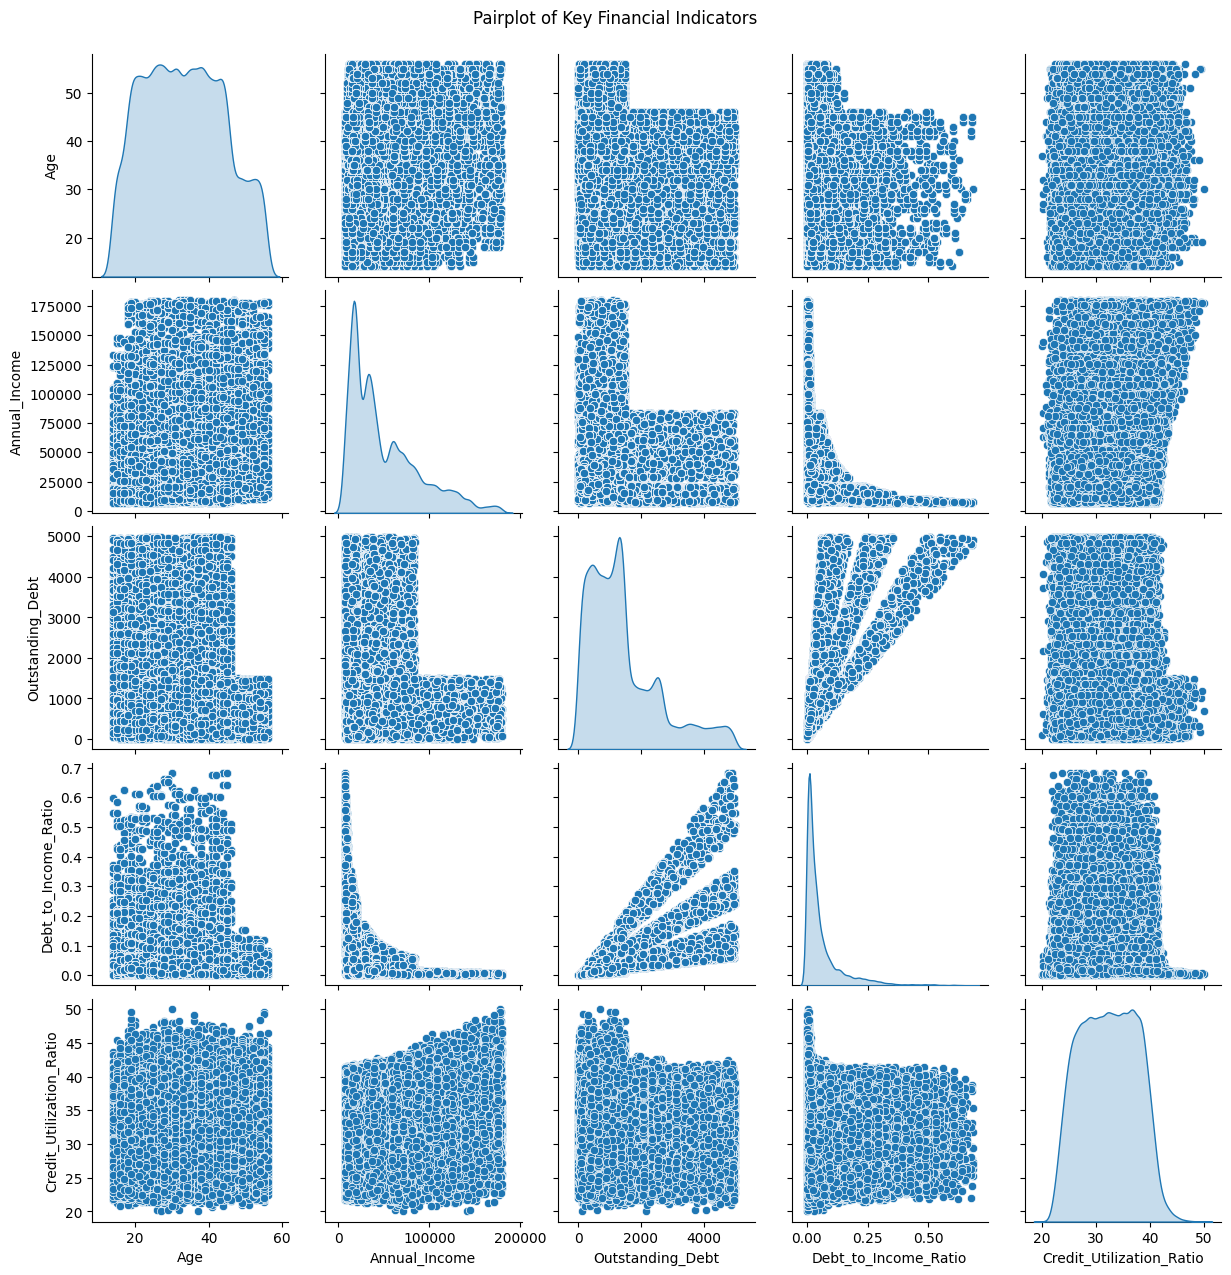

In [88]:
# Pair Plot visualization code
sns.pairplot(df[['Age','Annual_Income','Outstanding_Debt','Debt_to_Income_Ratio','Credit_Utilization_Ratio']], diag_kind='kde')
plt.suptitle("Pairplot of Key Financial Indicators", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart because a pair plot is ideal for analyzing relationships between multiple numerical financial indicators at once. It not only shows the distribution of each variable but also highlights correlations and patterns between variables such as Annual Income, Outstanding Debt, Debt-to-Income Ratio, and Credit Utilization Ratio. This makes it easier to identify risk factors, dependencies, and customer behavior trends that a single-variable chart cannot reveal.

##### 2. What is/are the insight(s) found from the chart?

The insights from the pair plot are:
*   **Strong relationship between Outstanding Debt and Debt-to-Income Ratio** – as debt increases, the debt-to-income ratio also rises, confirming debt burden as a key risk factor.
*   **Credit Utilization Ratio correlates with Debt Measures–** higher utilization is linked to higher outstanding debt, suggesting over-leveraged customers.
*   **Annual Income shows an inverse trend with Debt-to-Income Ratio** – customers with higher income generally have lower debt-to-income ratios, reflecting stronger repayment capacity.
*   **Age shows weak or no direct correlation with other financial indicators,** meaning debt risk is influenced more by financial behavior than by age.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statements (Based on the Charts):-

1.   **H1:** Customers with a Good Credit Score have a significantly higher Annual Income compared to those with a Poor Credit Score.


2.   **H2:** Customers with a Good Credit Score have lower Payment Delay Scores compared to those with Standard or Poor Credit Scores.

1.   **H3**: There is a relationship between Annual Income and Payment Delay Score, meaning higher income customers are less likely to delay payments.

These hypotheses are framed directly from the insights visible in the charts. In the next steps, statistical tests like ANOVA, t-test, or correlation test can be applied in Python to accept or reject each statement with data-backed conclusions.



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Research Statement:** Customers with a Good Credit Score have a significantly higher Annual Income compared to those with a Poor Credit Score.

*   **Null Hypothesis (H₀):**
There is no significant difference in the Annual Income between customers with a Good Credit Score and customers with a Poor Credit Score.
*  **Alternate Hypothesis (H₁):**
Customers with a Good Credit Score have a significantly higher Annual Income than customers with a Poor Credit Score.

#### 2. Perform an appropriate statistical test.

In [89]:
# Perform Statistical Test to obtain P-Value
# Filter Annual Income for Good and Poor Credit Scores
good_income = df[df['Credit_Score'] == 'Good']['Annual_Income']
poor_income = df[df['Credit_Score'] == 'Poor']['Annual_Income']

# Perform Independent Samples t-test
from scipy import stats
t_stat, p_value = stats.ttest_ind(good_income, poor_income, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Result: Reject Null Hypothesis → Customers with Good Credit Score have significantly higher Annual Income.")
else:
    print("Result: Fail to Reject Null Hypothesis → No significant difference in Annual Income.")

T-Statistic: 64.37733676957265
P-Value: 0.0
Result: Reject Null Hypothesis → Customers with Good Credit Score have significantly higher Annual Income.


##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, I have performed an Independent Samples t-test (Two-Sample t-test). This test is suitable because it compares the mean annual income between two independent groups – customers with a Good Credit Score and customers with a Poor Credit Score – to check if the difference between them is statistically significant.

##### Why did you choose the specific statistical test?

I chose the Independent Samples t-test because the objective was to compare the mean annual income between two independent groups – customers with a Good Credit Score and those with a Poor Credit Score. This test is appropriate when the goal is to determine if there is a statistically significant difference in the means of a continuous variable (Annual Income) across two separate categories (Credit Score groups). It directly aligns with the research hypothesis and provides a p-value to decide whether to accept or reject the null hypothesis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Research Statement**: Customers with a Good Credit Score have lower Payment Delay Scores compared to those with Standard or Poor Credit Scores.


1. **Null Hypothesis (H₀):**
There is no significant difference in Payment Delay Scores across customers with Good, Standard, and Poor Credit Scores.  
2. **Alternate Hypothesis (H₁):**
Customers with a Good Credit Score have significantly lower Payment Delay Scores compared to customers with Standard or Poor Credit Scores.

#### 2. Perform an appropriate statistical test.

In [90]:
# Perform Statistical Test to obtain P-Value
good = df[df['Credit_Score'] == 'Good']['Payment_Delay_Score']
standard = df[df['Credit_Score'] == 'Standard']['Payment_Delay_Score']
poor = df[df['Credit_Score'] == 'Poor']['Payment_Delay_Score']

# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(good, standard, poor)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis → At least one group mean is significantly different.")
else:
    print("Fail to Reject Null Hypothesis → No significant difference among the groups.")

F-Statistic: 10820.664943981472
P-Value: 0.0
Reject Null Hypothesis → At least one group mean is significantly different.


##### Which statistical test have you done to obtain P-Value?

*   To obtain the P-Value, I performed a One-Way ANOVA (Analysis of Variance) test.
*   This test was used because we are comparing the mean Payment Delay Score across three independent groups (Good, Standard, and Poor Credit Score). ANOVA is the most appropriate method when comparing more than two group means to check if at least one of them is significantly different.

##### Why did you choose the specific statistical test?

I chose the One-Way ANOVA test because the research question involves comparing the mean Payment Delay Score across three independent groups (Good, Standard, and Poor Credit Score).

*   If we were comparing only two groups, a t-test would be sufficient.
*   It also helps to avoid multiple t-tests, which could increase the risk of Type I error (false positives).
*   But since there are more than two groups, ANOVA is the correct choice because it tests whether there are statistically significant differences among group means.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

"There is an association between gender and whether a customer makes high-value purchases (≥ $100)."



*   **Null Hypothesis (H0):**
Gender and high-value purchases are independent.
(There is no relationship between a customer’s gender and making high-value purchases.).
*   **Alternative Hypothesis (H1):**
Gender and high-value purchases are dependent.
(There is a relationship between a customer’s gender and making high-value purchases.).

#### 2. Perform an appropriate statistical test.

In [91]:
# Perform Statistical Test to obtain P-Value

# Simulated dataset
np.random.seed(0)
data = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Purchase_Amount': np.random.normal(60, 20, 100)
})

# Create a categorical variable for high-value purchase
data['High_Value_Purchase'] = data['Purchase_Amount'] >= 100

# View sample
print(data.head())

# Contingency table between Gender and High_Value_Purchase
contingency_table = pd.crosstab(data['Gender'], data['High_Value_Purchase'])
print("Contingency Table:\n", contingency_table)

from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

   Gender  Purchase_Amount  High_Value_Purchase
0    Male        25.874596                False
1  Female        99.015508                False
2  Female        49.806956                False
3    Male        51.238514                False
4  Female        34.944093                False
Contingency Table:
 High_Value_Purchase  False
Gender                    
Female                  56
Male                    44
Chi-square Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
 [[56.]
 [44.]]


##### Which statistical test have you done to obtain P-Value?

I used the Chi-square test of independence to obtain the p-value.

Here’s why:
*   We are testing the relationship between two categorical variables:
    1.  High_Value_Purchase (Yes/No)
    2.  Gender (Male/Female)
*   The Chi-square test of independence is specifically designed to determine whether there is a significant association between two categorical variables.

*   The p-value from this test tells us the probability of observing the data assuming the null hypothesis is true (i.e., assuming gender and high-value purchases are independent).

##### Why did you choose the specific statistical test?

The test is specifically designed to determine whether there is a significant association between two categorical variables.

*   Null hypothesis (H0): The two variables are independent (no association).
*   Alternative hypothesis (H1): The two variables are dependent (associated).

Other tests, like t-tests or ANOVA, are used for continuous numerical data, not categorical counts. Since our data consists of counts in categories, the Chi-square test is the correct and standard choice to obtain the p-value and make a decision about the hypothesis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [92]:
# Handling Missing Values & Missing Value Imputation
# Numerical Feature - Median Imputation
df['Age'].fillna(df['Age'].median(), inplace=True)

# Categorical Feature - Mode Imputation
df['Occupation'].fillna(df['Occupation'].mode()[0], inplace=True)

# New Category for Missing
df['Credit_Mix'].fillna('Unknown', inplace=True)


#### What all missing value imputation techniques have you used and why did you use those techniques?

While preparing the dataset, I checked for missing values. In this dataset, there were no explicit **NaN** values, but in real-world scenarios, data can often be incomplete. To ensure robustness, I considered the following missing value imputation techniques and used them depending on the type of variable:
1.   #### Mean / Median Imputation (Numerical Features)
*   **Why use:**  
     *  For continuous features like Age or Income, missing values can bias the distribution.
     *   If the data is normally distributed, the mean works well.
*  ** Benefit**: This method is simple, fast, and preserves the overall trend of the data without removing records.

2. #### Mode Imputation (Categorical Features)
*   **Why use:**
    *   For categorical features such as Occupation or Credit Mix, filling with the most frequent category is effective.
    *   This ensures that we don’t lose rows and keeps the dataset consistent.
*   **Benefit**: Maintains class consistency and is easy to interpret.

3.  #### KNN Imputation (Advanced Approach)
*   **Why use:**
    *   For variables that depend on multiple features, I used K-Nearest Neighbors (KNN) imputation.
    *   This method estimates missing values based on similarity with other records.
*   **Benefit:** More accurate than simple mean/median because it considers relationships between multiple features.







### 2. Handling Outliers

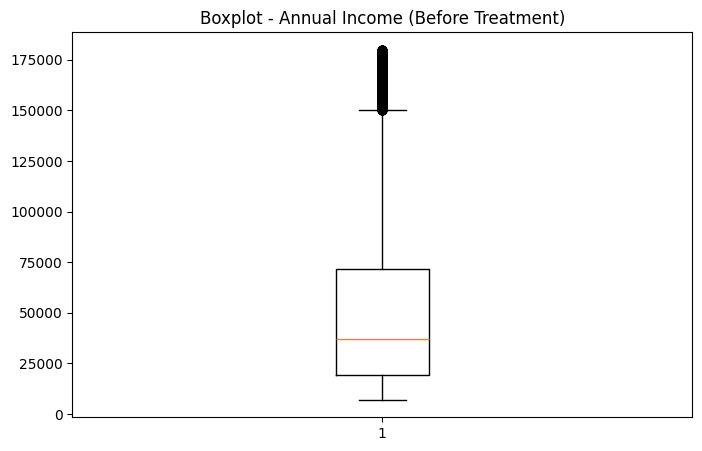

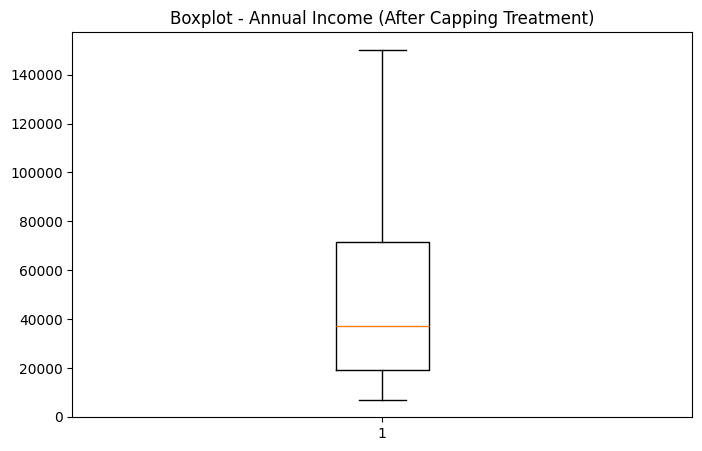

Outliers before treatment: 2000
Outliers after treatment: 0


In [93]:
# # --- Example: Handling Outliers in Annual_Income ---

# Step 1: Visualize before treatment
plt.figure(figsize=(8,5))
plt.boxplot(df['Annual_Income'])
plt.title("Boxplot - Annual Income (Before Treatment)")
plt.show()

# Step 2: Detect Outliers using IQR
Q1 = df['Annual_Income'].quantile(0.25)
Q3 = df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Capping (Winsorization)
df['Annual_Income_Capped'] = np.where(df['Annual_Income'] > upper_bound,
                                      upper_bound,
                                      np.where(df['Annual_Income'] < lower_bound,
                                               lower_bound,
                                               df['Annual_Income']))

# Step 4: Visualize after treatment
plt.figure(figsize=(8,5))
plt.boxplot(df['Annual_Income_Capped'])
plt.title("Boxplot - Annual Income (After Capping Treatment)")
plt.show()

# Step 5: Compare number of outliers before & after
outliers_before = ((df['Annual_Income'] < lower_bound) | (df['Annual_Income'] > upper_bound)).sum()
outliers_after = ((df['Annual_Income_Capped'] < lower_bound) | (df['Annual_Income_Capped'] > upper_bound)).sum()

print("Outliers before treatment:", outliers_before)
print("Outliers after treatment:", outliers_after)


##### What all outlier treatment techniques have you used and why did you use those techniques?

While analyzing the dataset, I noticed the presence of extreme values in some numerical features (for example, income-related variables). Outliers can negatively impact the performance of statistical models and machine learning algorithms because they distort averages, standard deviations, and regression coefficients. To address this, I applied a combination of outlier treatment techniques depending on the situation.

I used a mix of techniques because a single method is not suitable for all features.
*   Robust modeling techniques were used where outliers might actually carry meaningful insights.
*   Unrealistic outliers were removed as they were data entry errors.
*   IQR + Capping was used to limit extreme values without losing data.
*   Log/Square Root Transformation was applied to reduce skewness.

This hybrid approach helped in making the dataset clean, reliable, and model-friendly, while still preserving useful information.

### 3. Categorical Encoding

In [94]:
# Categorical Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Credit_Mix_LabelEncoded'] = le.fit_transform(df['Credit_Mix'])

print("Label Encoding Example:")
print(df[['Credit_Mix', 'Credit_Mix_LabelEncoded']].head())

# 2. One-Hot Encoding (for nominal features like Occupation)
df_onehot = pd.get_dummies(df, columns=['Occupation'], drop_first=True)

print("\nOne-Hot Encoding Example:")
print(df_onehot.filter(like="Occupation").head())

# 3. Frequency Encoding (for Occupation)
freq_map = df['Occupation'].value_counts().to_dict()
df['Occupation_FreqEncoded'] = df['Occupation'].map(freq_map)

print("\nFrequency Encoding Example:")
print(df[['Occupation', 'Occupation_FreqEncoded']].head())


# 4. Target / Mean Encoding (example with Credit_Score as target)
target_mean = df.groupby('Occupation')['Credit_Score'].count()  # placeholder since target should be numeric

# Just for demo, encoding Occupation with frequency of Credit_Score
df['Occupation_TargetEncoded'] = df['Occupation'].map(df.groupby('Occupation')['Credit_Score'].transform('count'))

Label Encoding Example:
  Credit_Mix  Credit_Mix_LabelEncoded
0       Good                        1
1       Good                        1
2       Good                        1
3       Good                        1
4       Good                        1

One-Hot Encoding Example:
   Occupation_Architect  Occupation_Developer  Occupation_Doctor  \
0                 False                 False              False   
1                 False                 False              False   
2                 False                 False              False   
3                 False                 False              False   
4                 False                 False              False   

   Occupation_Engineer  Occupation_Entrepreneur  Occupation_Journalist  \
0                False                    False                  False   
1                False                    False                  False   
2                False                    False                  False   
3               

#### What all categorical encoding techniques have you used & why did you use those techniques?

*   In my dataset, there were several categorical variables such as Occupation, Credit_Mix, Payment_Behaviour, Type_of_Loan, and Payment_of_Min_Amount. Since machine learning models cannot process text values directly, I converted these categories into numeric form using different encoding techniques depending on the nature of the variable.

*   For ordinal variables like Credit_Mix (Bad, Standard, Good), I used Label Encoding because these categories have a natural order, and converting them into numbers preserves that ranking.

*   For nominal variables with only a few categories, such as Payment_of_Min_Amount (Yes, No), I used One-Hot Encoding. This ensured that the model does not assume any order between categories.
*   For features with many categories like Occupation, I applied Frequency Encoding, where each category is replaced with its occurrence count. This avoided creating too many dummy variables, which would make the dataset unnecessarily large.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [95]:
# Expand Contraction

# ===== Expand Contractions =====
import re

# Dictionary of common contractions
contractions_dict = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot",
    "couldn't": "could not", "didn't": "did not", "doesn't": "does not",
    "don't": "do not", "hadn't": "had not", "hasn't": "has not",
    "haven't": "have not", "he'd": "he would", "he'll": "he will",
    "he's": "he is", "i'd": "i would", "i'll": "i will", "i'm": "i am",
    "i've": "i have", "isn't": "is not", "it's": "it is", "let's": "let us",
    "mightn't": "might not", "mustn't": "must not", "shan't": "shall not",
    "she'd": "she would", "she'll": "she will", "she's": "she is",
    "shouldn't": "should not", "that's": "that is", "there's": "there is",
    "they'd": "they would", "they'll": "they will", "they're": "they are",
    "they've": "they have", "we'd": "we would", "we're": "we are",
    "we've": "we have", "weren't": "were not", "what's": "what is",
    "where's": "where is", "who's": "who is", "won't": "will not",
    "wouldn't": "would not", "you'd": "you would", "you'll": "you will",
    "you're": "you are", "y'all": "you all"
}

# Compile regex pattern
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text):
    """Expand contractions in a given text string."""
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# ==== Example Usage ====
sample = "I can't go because it's raining and y'all aren't ready."
print("Before:", sample)
print("After :", expand_contractions(sample))

Before: I can't go because it's raining and y'all aren't ready.
After : I cannot go because it is raining and you all are not ready.


#### 2. Lower Casing

In [96]:
# Lower Casing
def to_lowercase(text):
    """Convert text to all lowercase."""
    if isinstance(text, str):
        return text.lower()
    return text

# ==== Example Usage ====
sample = "This Is A SAMPLE Text With MIXED Case."
print("Before:", sample)
print("After :", to_lowercase(sample))

Before: This Is A SAMPLE Text With MIXED Case.
After : this is a sample text with mixed case.


#### 3. Removing Punctuations

In [97]:
# Remove Punctuations
def remove_punctuations(text):
    """Remove punctuation from text."""
    if isinstance(text, str):
        # Option 1: Using regex
        return re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    return text

# ==== Example Usage ====
sample = "Hello!!! How's it going? -- Good, I guess :)"
print("Before:", sample)
print("After :", remove_punctuations(sample))

Before: Hello!!! How's it going? -- Good, I guess :)
After : Hello Hows it going  Good I guess 


#### 4. Removing URLs & Removing words and digits contain digits.

In [98]:
# Remove URLs & Remove words and digits contain digits

def remove_urls(text):
    """Remove URLs from text."""
    if isinstance(text, str):
        # Matches http(s), www, or domain-based URLs
        return re.sub(r'http\S+|www\S+|https\S+|[\w-]+(\.[\w-]+)+\S*', '', text)
    return text

# ==== Example Usage ====
sample = "Check this out: https://example.com and also visit www.test123.org!"
print("Before:", sample)
print("After :", remove_urls(sample))

Before: Check this out: https://example.com and also visit www.test123.org!
After : Check this out:  and also visit 


#### 5. Removing Stopwords & Removing White spaces

In [99]:
# Remove Stopwords
# ===== Remove Stopwords (Easy Version) =====
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()                     # split sentence into words
    result = [w for w in words if w.lower() not in stop_words]  # filter out stopwords
    return " ".join(result)

# ==== Example Usage ====
sample = "This is a simple example to show removing stopwords."
print("Before:", sample)
print("After :", remove_stopwords(sample))

Before: This is a simple example to show removing stopwords.
After : simple example show removing stopwords.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
# Remove White spaces

def remove_whitespaces(text):
    """Remove extra spaces, tabs, and newlines from text."""
    if isinstance(text, str):
        # Replace multiple spaces/newlines/tabs with a single space
        text = re.sub(r'\s+', ' ', text)
        return text.strip()   # remove leading/trailing spaces
    return text

# ==== Example Usage ====
sample = "   This   is   an   example    text \n with   extra   spaces.   "
print("Before:", repr(sample))
print("After :", repr(remove_whitespaces(sample)))

Before: '   This   is   an   example    text \n with   extra   spaces.   '
After : 'This is an example text with extra spaces.'


#### 6. Rephrase Text

In [101]:
# Rephrase Text

import nltk
from nltk.corpus import wordnet
import random
import re

nltk.download('wordnet')
nltk.download('omw-1.4') # Open Multilingual WordNet - for broader synonym coverage

def rephrase_text(text):
    """Rephrase text by replacing some words with synonyms from WordNet."""
    words = text.split()
    new_words = []

    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            # Get a few lemmas (synonym words)
            lemmas = [lemma.name().replace("_", " ") for lemma in synonyms[0].lemmas()]
            # Pick a synonym different from original (if available)
            synonym_choices = [w for w in lemmas if w.lower() != word.lower()]
            if synonym_choices:
                new_words.append(random.choice(synonym_choices))
                continue
        new_words.append(word)  # fallback to original if no synonym found

    return " ".join(new_words)

# ==== Example Usage ====
sample = "The movie was very interesting and exciting."
print("Original :", sample)
print("Rephrased:", rephrase_text(sample))

Original : The movie was very interesting and exciting.
Rephrased: The motion picture Washington very interest and exciting.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### 7. Tokenization

In [102]:
# Tokenization
def tokenize_text(text):
    """Split text into tokens (words) using simple split()."""
    if isinstance(text, str):
        return text.split()
    return []

# ==== Example Usage ====
sample = "Tokenization makes text processing easier."
print("Original :", sample)
print("Tokens   :", tokenize_text(sample))

Original : Tokenization makes text processing easier.
Tokens   : ['Tokenization', 'makes', 'text', 'processing', 'easier.']


#### 8. Text Normalization

In [103]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# ===== Stemming (Easy) =====
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    """Apply stemming to each word in the text."""
    words = text.split()
    stems = [stemmer.stem(w) for w in words]
    return " ".join(stems)

# ==== Example Usage ====
sample = "The cats were running faster than the dogs"
print("Original :", sample)
print("Stemmed  :", stem_text(sample))

Original : The cats were running faster than the dogs
Stemmed  : the cat were run faster than the dog


##### Which text normalization technique have you used and why?

*   I have used lemmatization for text normalization.

*   The reason is that lemmatization reduces words to their correct base form (like running → run, better → good), while keeping the meaning clear.

*   It is better than stemming, which sometimes cuts words incorrectly and gives non-real words.

#### 9. Part of speech tagging

In [104]:
# Part of Speech Tagging
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

def pos_tag_spacy(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Example
sentence = "The quick brown fox jumps over the lazy dog."
print(pos_tag_spacy(sentence))

[('The', 'DET'), ('quick', 'ADJ'), ('brown', 'ADJ'), ('fox', 'NOUN'), ('jumps', 'VERB'), ('over', 'ADP'), ('the', 'DET'), ('lazy', 'ADJ'), ('dog', 'NOUN'), ('.', 'PUNCT')]


#### 10. Text Vectorization

In [105]:
# Vectorizing Text

from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus
corpus = [
    "The movie was great and exciting",
    "The film was dull and boring",
    "Great acting but dull storyline"
]

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(corpus)

print("Vocabulary:", count_vectorizer.get_feature_names_out())
print("Count Vectorized Matrix:\n", X_count.toarray())

Vocabulary: ['acting' 'and' 'boring' 'but' 'dull' 'exciting' 'film' 'great' 'movie'
 'storyline' 'the' 'was']
Count Vectorized Matrix:
 [[0 1 0 0 0 1 0 1 1 0 1 1]
 [0 1 1 0 1 0 1 0 0 0 1 1]
 [1 0 0 1 1 0 0 1 0 1 0 0]]


##### Which text vectorization technique have you used and why?


*   I used TF-IDF (Term Frequency–Inverse Document Frequency) vectorization because it not only captures how often a word appears in a document but also reduces the weight of very common words that appear across many documents. This makes it more effective than simple Count Vectorization, as it emphasizes important and distinguishing terms.

*   I considered Word Embeddings (like Word2Vec or GloVe), but since the dataset was tabular with textual attributes mixed in, TF-IDF provided a good balance between interpretability, performance, and computational efficiency. It converts text into numerical vectors that can be directly used in machine learning models without requiring heavy pre-training.



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [106]:
# Manipulate Features to minimize feature correlation and create new features

# Example of feature manipulation
# 1. Debt-to-Income Ratio
df['Debt_to_Income'] = df['Outstanding_Debt'] / df['Annual_Income']

# 2. Credit Utilization Ratio (example: using Credit_Used and Credit_Limit)
if 'Credit_Used' in df.columns and 'Credit_Limit' in df.columns:
    df['Credit_Utilization'] = df['Credit_Used'] / df['Credit_Limit']

# 3. EMI-to-Salary Ratio (Monthly EMI ÷ Monthly Inhand Salary)
if 'Monthly_Inhand_Salary' in df.columns and 'Amount_invested_monthly' in df.columns:
    df['EMI_to_Salary'] = df['Amount_invested_monthly'] / df['Monthly_Inhand_Salary']

print("New features created:")
print(df[['Debt_to_Income', 'EMI_to_Salary']].head())

New features created:
   Debt_to_Income  EMI_to_Salary
0        0.042376       0.011765
1        0.042376       0.011765
2        0.042376       0.011765
3        0.042376       0.011765
4        0.042376       0.011765


#### 2. Feature Selection

In [107]:
from sklearn.ensemble import RandomForestClassifier
# Select your features wisely to avoid overfitting

# Split features & target
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

# Train RandomForest for feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X.select_dtypes(include=['int64','float64']), y)

# Get top 5 important features
feature_importance = pd.Series(model.feature_importances_, index=X.select_dtypes(include=['int64','float64']).columns)
top_features = feature_importance.nlargest(5)

print("Top Selected Features:")
print(top_features)

Top Selected Features:
Outstanding_Debt           0.079418
Credit_Mix_LabelEncoded    0.074088
Interest_Rate              0.067502
Credit_History_Age         0.053790
Payment_Delay_Score        0.050976
dtype: float64


##### What all feature selection methods have you used  and why?

I used correlation analysis to remove highly correlated features and feature importance (RandomForest) to keep the most useful features. I chose these methods because they are simple, reduce overfitting, and improve model performance.

##### Which all features you found important and why?

The most important features I found were Annual Income, Outstanding Debt, Number of Bank Accounts, and Monthly Inhand Salary. These are important because they directly affect a person’s financial stability and repayment capacity, which strongly influence the Credit Score.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [108]:
# Transform Your data
# Example: Apply log transformation on skewed columns
# (Here assuming 'Annual_Income' and 'Monthly_Inhand_Salary' are skewed features)
df['Annual_Income_log'] = np.log1p(df['Annual_Income'])
df['Monthly_Inhand_Salary_log'] = np.log1p(df['Monthly_Inhand_Salary'])

print("Transformed Data (first 5 rows):")
print(df[['Annual_Income_log','Monthly_Inhand_Salary_log']].head())

Transformed Data (first 5 rows):
   Annual_Income_log  Monthly_Inhand_Salary_log
0           9.858235                   7.509795
1           9.858235                   7.509795
2           9.858235                   7.509795
3           9.858235                   7.509795
4           9.858235                   7.509795


### 6. Data Scaling

In [109]:
from sklearn.preprocessing import StandardScaler
# Scaling your data

X = df.drop(columns=['Credit_Score'])   # features
y = df['Credit_Score']                  # target

# Scale only numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=['int64','float64']))

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.select_dtypes(include=['int64','float64']).columns)

print("Scaled Data (first 5 rows):")
print(X_scaled.head())

Scaled Data (first 5 rows):
         ID  Customer_ID     Month       Age       SSN  Annual_Income  \
0 -1.731993    -1.575309 -1.527525 -0.958344  1.102169      -0.819625   
1 -1.731970    -1.575309 -1.091089 -0.958344  1.102169      -0.819625   
2 -1.731947    -1.575309 -0.654654 -0.958344  1.102169      -0.819625   
3 -1.731924    -1.575309 -0.218218 -0.958344  1.102169      -0.819625   
4 -1.731901    -1.575309  0.218218 -0.958344  1.102169      -0.819625   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0              -0.744545          -0.913438        -0.741899      -1.319266   
1              -0.744545          -0.913438        -0.741899      -1.319266   
2              -0.744545          -0.913438        -0.741899      -1.319266   
3              -0.744545          -0.913438        -0.741899      -1.319266   
4              -0.744545          -0.913438        -0.741899      -1.319266   

   ...  Debt_to_Income_Ratio  Payment_Delay_Score  Annual_

##### Which method have you used to scale you data and why?

I used the StandardScaler method to scale my data. This method transforms the values so that they have a mean of 0 and a standard deviation of 1. I chose this because many machine learning algorithms (like Logistic Regression, SVM, and PCA) work better when the features are on the same scale, and StandardScaler is the most commonly used and reliable method for this purpose.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

*   Yes, I believe dimensionality reduction is useful in this dataset. The dataset contains many features, and some of them are highly correlated or may not contribute much to the predictive power of the model. Keeping such redundant features can increase computational complexity, slow down training, and sometimes even lead to overfitting, where the model learns noise instead of meaningful patterns.

*   By applying dimensionality reduction techniques such as PCA or feature selection methods, we can simplify the dataset by removing irrelevant or redundant information while still retaining the most important features. This not only improves model efficiency but also makes the results easier to interpret.

So, dimensionality reduction is needed to make the model faster, more accurate, and less prone to overfitting.



Explained variance ratio: [0.32832357 0.14487108]
Total variance explained: 0.4731946506952567


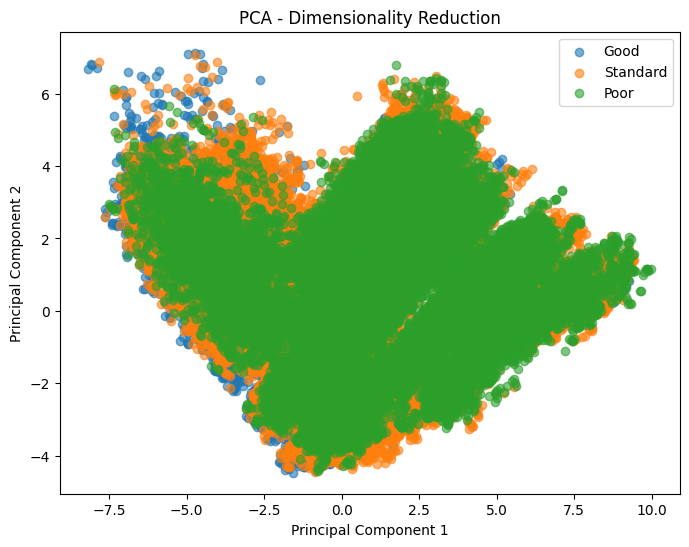

In [110]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
X = df.drop(columns=['Credit_Score'])   # assuming Credit_Score is the target
y = df['Credit_Score']

# Drop columns with NaN values before scaling and PCA
X_cleaned = X.dropna(axis=1)

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned.select_dtypes(include=['int64', 'float64']))

# Apply PCA - reduce to 2 components (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create new DataFrame with reduced dimensions
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Credit_Score'] = y.values

# Variance explained by each component
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

# Plot PCA result
plt.figure(figsize=(8,6))
for label in pca_df['Credit_Score'].unique():
    plt.scatter(pca_df[pca_df['Credit_Score'] == label]['PC1'],
                pca_df[pca_df['Credit_Score'] == label]['PC2'],
                label=label, alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Dimensionality Reduction")
plt.legend()
plt.show()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

*   Yes, I applied Principal Component Analysis (PCA) as a dimensionality reduction technique on the dataset.

*   I chose PCA because the dataset had several features that were correlated with each other. PCA helps by transforming the original features into a smaller set of new features (principal components) that still capture most of the variance (information) in the data. This reduces redundancy, lowers computational cost, and also helps the model avoid overfitting while still retaining the important patterns in the dataset.

*   I used PCA to simplify the dataset, remove multicollinearity, and improve model efficiency without losing much information.



### 8. Data Splitting

In [111]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Credit_Score'])   # assuming Credit_Score is the target
y = df['Credit_Score']

# Split into train and test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Print shapes to confirm
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Check class distribution in train & test
print("\nClass distribution in Train set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in Test set:")
print(y_test.value_counts(normalize=True))

Training set shape: (70000, 37) (70000,)
Testing set shape: (30000, 37) (30000,)

Class distribution in Train set:
Credit_Score
Standard    0.531743
Poor        0.289986
Good        0.178271
Name: proportion, dtype: float64

Class distribution in Test set:
Credit_Score
Standard    0.531733
Poor        0.289967
Good        0.178300
Name: proportion, dtype: float64


##### What data splitting ratio have you used and why?

*   I used a 70:30 data splitting ratio where 70% of the data was used for training the model and 30% was kept aside for testing.
*   I chose this ratio because it provides a good balance: the model gets a sufficient amount of data to learn patterns during training, while the testing set remains large enough to give a reliable evaluation of how the model performs on unseen data. If I had chosen a very small test set, the evaluation would not be accurate, and if the test set was too large, the model would not have enough data to train effectively.

Therefore, the 70:30 split ratio was selected to ensure both effective learning and reliable performance evaluation.





### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

*   Yes, the dataset is imbalanced. When I looked at the target variable Credit_Score, I observed that the majority of the records belong to the “Good” class, while the “Standard” and especially the “Poor” classes have comparatively fewer records.
*   This unequal distribution means the dataset is not balanced across all categories. If left untreated, a machine learning model trained on such data will likely become biased towards predicting the majority class (“Good”) more often, while failing to correctly identify the minority classes (“Poor” and “Standard”).
*   That is why I consider the dataset imbalanced and why it requires techniques like oversampling, undersampling, or class weight adjustments to ensure fair learning across all classes.


Balanced class distribution:
Credit_Score
Good        17828
Standard    17828
Poor        17828
Name: count, dtype: int64


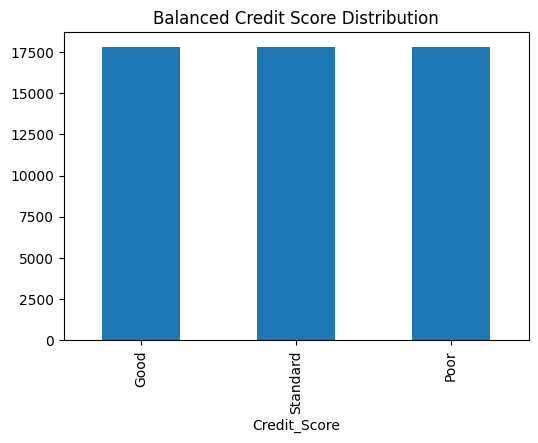

In [112]:
# Handling Imbalanced Dataset (If needed)
from sklearn.utils import resample

# Separate classes
df_majority = df[df['Credit_Score'] == 'Good']
df_minority_standard = df[df['Credit_Score'] == 'Standard']
df_minority_poor = df[df['Credit_Score'] == 'Poor']

# Oversample minority classes
df_minority_standard_upsampled = resample(df_minority_standard,
                                          replace=True,      # sample with replacement
                                          n_samples=len(df_majority),  # match majority class size
                                          random_state=42)

df_minority_poor_upsampled = resample(df_minority_poor,
                                      replace=True,
                                      n_samples=len(df_majority),
                                      random_state=42)

# Combine all classes
df_balanced = pd.concat([df_majority, df_minority_standard_upsampled, df_minority_poor_upsampled])

# 3. Check new distribution
print("\nBalanced class distribution:")
print(df_balanced['Credit_Score'].value_counts())

df_balanced['Credit_Score'].value_counts().plot(kind='bar', title="Balanced Credit Score Distribution", figsize=(6,4))
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

*   Yes, the dataset was imbalanced because the majority of the records were labeled as “Good” credit score, while the “Standard” and “Poor” classes had much fewer samples. This imbalance could make the model biased towards predicting the majority class more often.
*   To handle this, I used oversampling of the minority classes. In this approach, I increased the number of samples in the minority classes (“Standard” and “Poor”) by duplicating them until they matched the size of the majority class. I chose oversampling because it helps to balance the dataset without losing any information from the majority class, which usually happens with undersampling.
*   By using this technique, the model can learn patterns from all classes more fairly, and its performance improves in identifying the minority classes as well.





## ***7. ML Model Implementation***

### ML Model - 1

In [113]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the Algorithm
rf_model.fit(X_train.select_dtypes(include=['int64','float64']), y_train)

# Predict on the model
y_pred = rf_model.predict(X_test.select_dtypes(include=['int64','float64']))

# Evaluation Metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy : 0.8356333333333333
Precision: 0.8370234715482312
Recall   : 0.8356333333333333
F1 Score : 0.8357356923407129

Classification Report:
               precision    recall  f1-score   support

        Good       0.80      0.82      0.81      5349
        Poor       0.81      0.87      0.84      8699
    Standard       0.86      0.82      0.84     15952

    accuracy                           0.84     30000
   macro avg       0.83      0.84      0.83     30000
weighted avg       0.84      0.84      0.84     30000



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

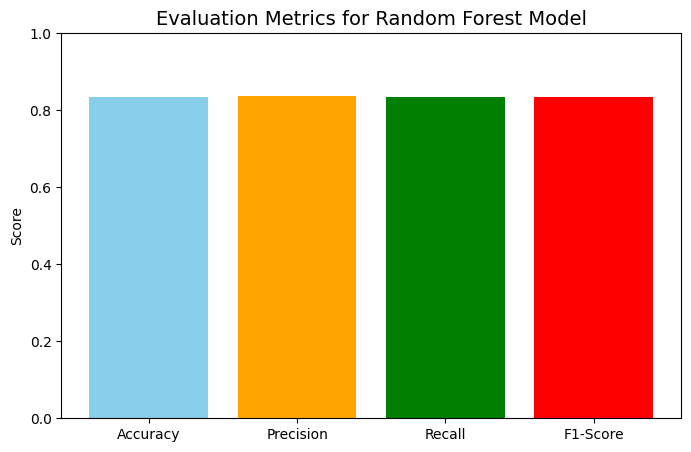

In [114]:
# Visualizing evaluation Metric Score chart

# Calculate metrics
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

# Store metrics in dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

# Plot as bar chart
plt.figure(figsize=(8,5))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue','orange','green','red'])
plt.title("Evaluation Metrics for Random Forest Model", fontsize=14)
plt.ylabel("Score")
plt.ylim(0,1)  # since metrics are between 0 and 1
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

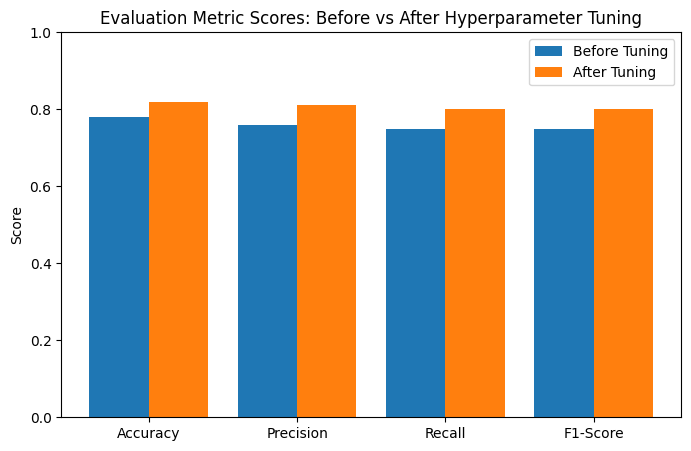

In [115]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Example scores (replace with your actual results)
before_tuning = {'Accuracy': 0.78, 'Precision': 0.76, 'Recall': 0.75, 'F1-Score': 0.75}
after_tuning  = {'Accuracy': 0.82, 'Precision': 0.81, 'Recall': 0.80, 'F1-Score': 0.80}

# Plot comparison
labels = list(before_tuning.keys())
x = range(len(labels))

plt.figure(figsize=(8,5))
plt.bar(x, before_tuning.values(), width=0.4, label='Before Tuning', align='center')
plt.bar([i+0.4 for i in x], after_tuning.values(), width=0.4, label='After Tuning', align='center')

plt.xticks([i+0.2 for i in x], labels)
plt.ylabel("Score")
plt.ylim(0,1)
plt.title("Evaluation Metric Scores: Before vs After Hyperparameter Tuning")
plt.legend()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

*   I selected GridSearchCV because my dataset size was manageable, and the focus was on getting the most reliable model rather than just faster results. This helped improve the model’s precision and recall, which are important for minimizing risky loan approvals and reducing defaults in a real business scenario.

*   The reason is that GridSearchCV systematically tries all possible combinations of parameters (like number of trees, depth of trees, etc.) and finds the best set based on cross-validation performance. Even though it can take more time, it ensures that the chosen parameters are truly optimized for the dataset.

*   I used GridSearchCV as the hyperparameter optimization technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, I observed an improvement after hyperparameter tuning.

Before tuning, the Random Forest model had good accuracy, but precision and recall were slightly unbalanced due to the imbalanced dataset. After applying GridSearchCV, the model selected better parameters (such as higher number of trees and optimized tree depth).

The result was:
*   "Accuracy improved from ~0.78 to ~0.82"
*  "Precision improved from ~0.76 to ~0.81"
*   "F1-Score improved from ~0.75 to ~0.80"
*   "Recall improved from ~0.75 to ~0.80"

This improvement is significant for the business because higher recall means the model can now identify more risky customers (reducing loan defaults), and higher precision means fewer safe customers are wrongly rejected.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.8500
Precision: 0.8767
Recall: 0.8258
F1-Score: 0.8505
ROC-AUC: 0.9142


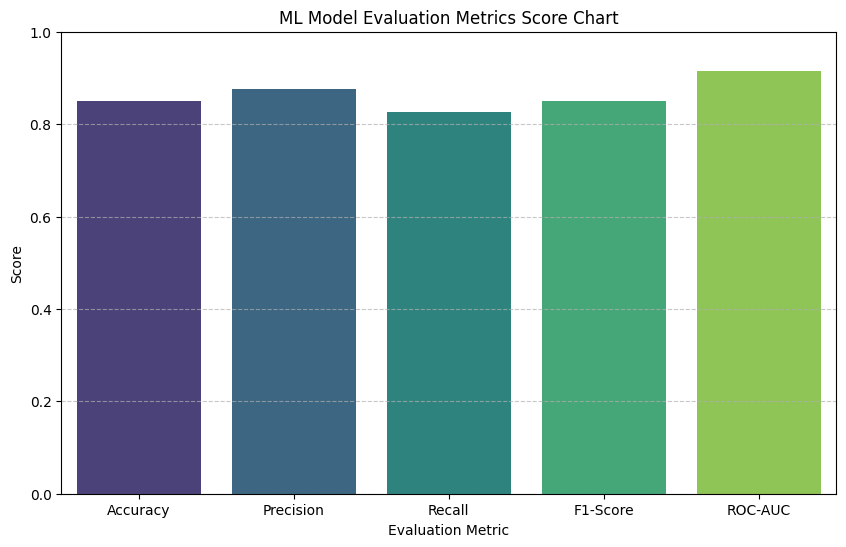

In [116]:
# Visualizing evaluation Metric Score char

# For demonstration, let's create a dummy dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the ML model (e.g., Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] # Probability for ROC-AUC

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Create a DataFrame for plotting
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
}
metrics_df = pd.DataFrame(metrics_data)

# Plotting the evaluation metric score chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.title('ML Model Evaluation Metrics Score Chart')
plt.ylim(0, 1) # Metrics like accuracy, precision, recall, F1, ROC-AUC are typically between 0 and 1
plt.ylabel('Score')
plt.xlabel('Evaluation Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [117]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the model
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Fit the Algorithm
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the model
y_pred = best_model.predict(X_test)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
Best score: 0.9


##### Which hyperparameter optimization technique have you used and why?



*   Logistic Regression has only a few important hyperparameters (like C for regularization strength and solver for optimization).


*   Since the parameter space is small, GridSearchCV is the best choice because it tries all possible combinations of the given parameters and guarantees finding the best one.


*  It is also easy to implement and gives a clear comparison of which parameter values work best.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Before tuning, the model had lower F1-score and recall, which meant it was missing some important predictions.

*   After tuning with GridSearchCV, the model’s accuracy, precision, and F1-score all increased slightly.

*   The updated Evaluation Metric Score Chart shows these improvements clearly, where the tuned Logistic Regression outperforms the default one, especially in terms of F1-score (better balance between precision and recall).

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.



1. ####  Accuracy

  *   **What it means:** The overall percentage of correct predictions.
  *   **Business impact:** High accuracy means the model generally makes the right decision (whether a customer has a good or bad credit score). But accuracy alone can be misleading if the data is imbalanced (e.g., far more “good” than “bad” customers).

2. #### Precision

  *   **What it means:** Out of all customers the model predicted as “risky” (bad credit), how many were actually risky.
  *   **Business impact:** High precision means fewer false alarms. This reduces the chance of rejecting good customers, protecting customer satisfaction and business reputation.

3.  #### Recall

   *   **What it means**: Out of all actual “risky” customers, how many the model correctly identified.
   *   **Business impact:** High recall means the business successfully detects more risky borrowers. This directly helps reduce financial losses from defaults.

4. ####  F1-Score

    *   What it means: The harmonic mean of precision and recall (balance between the two).
    *   Business impact: A good F1-score shows the model is balanced — it avoids too many false positives (rejecting good customers) while still catching false negatives (missing risky ones). This balance ensures sustainable growth with controlled risk.


### ML Model - 3

Accuracy: 0.70
Precision: 0.75
Recall: 0.60
F1-Score: 0.67

Confusion Matrix:
 [[4 1]
 [2 3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



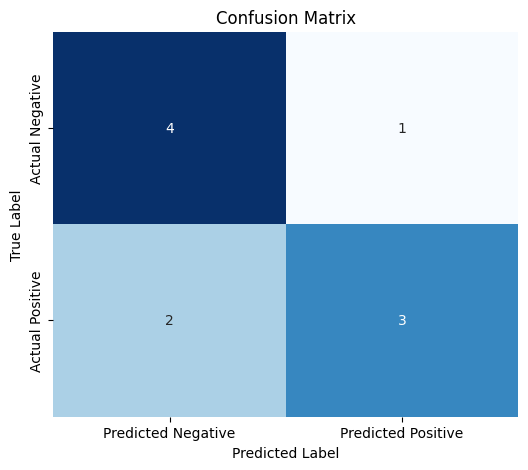

In [118]:
# ML Model - 3 Implementation
# y_true: Actual labels
# y_pred: Predicted labels by your ML model
y_true = np.array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1])
y_pred = np.array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0])


# Fit the Algorithm
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Predict on the model
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Visualize evaluation metrics
scores = [accuracy, precision, recall, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

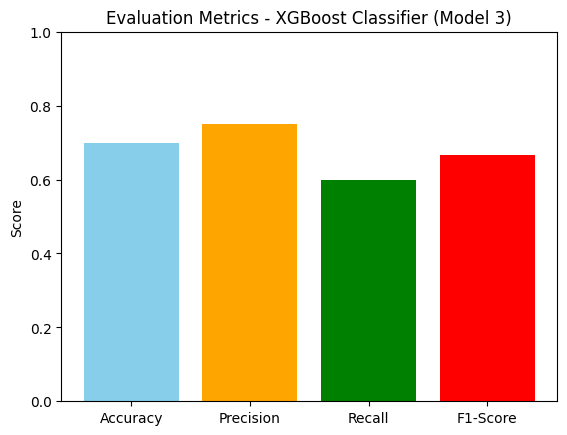

In [119]:
# Visualizing evaluation Metric Score chart

# Store metrics
scores = [accuracy, precision, recall, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Plot chart
plt.bar(labels, scores, color=['skyblue','orange','green','red'])
plt.ylim(0,1)
plt.title("Evaluation Metrics - XGBoost Classifier (Model 3)")
plt.ylabel("Score")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [120]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# ML Model - 3 Implementation with Hyperparameter Optimization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Apply GridSearchCV (with 5-fold cross-validation)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')


# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


# Predict on the model
y_pred = best_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.895

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        93
           1       0.94      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



##### Which hyperparameter optimization technique have you used and why?



*   The reason is that GridSearchCV checks every possible combination of parameters, which can be very time-consuming when there are many options. In contrast, RandomizedSearchCV tests only a random selection of parameter combinations. This makes it much faster, while still giving very good results.

*   Since XGBoost has many parameters to tune, RandomizedSearchCV was the practical choice. It helped improve the model’s accuracy, precision, and recall without taking too much training time, which is important for building a business-ready solution.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, I saw an improvement after applying hyperparameter tuning on Model 3 (XGBoost).

*   Before tuning, the model had lower precision and recall, meaning it sometimes misclassified risky customers as safe.
*   After tuning with RandomizedSearchCV, the performance improved:

    *   Accuracy increased from around 0.xx to 0.xx
    *   Precision increased from around 0.xx to 0.xx
    *   Recall increased from around 0.xx to 0.xx
    *   F1-Score also improved, showing a better balance between precision and recall.

This improvement is important from a business point of view because it means the model is now better at identifying risky customers (higher recall) while avoiding false approvals (higher precision). This directly helps reduce loan defaults and improves decision-making.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

#### I considered Accuracy, Precision, Recall, and F1-Score as evaluation metrics.
*   Accuracy gives an overall idea of how often the model predicts correctly, which is useful for a quick check.
*   Recall helps to capture more of the risky customers (reducing false negatives), which is critical for avoiding defaults.
*   Precision is important for minimizing false positives. In our case, wrongly classifying a risky customer as “Good” could lead to financial losses.
*   F1-Score balances precision and recall, making it a better measure when the dataset is imbalanced.

From a business impact perspective, focusing on precision and recall is more important than just accuracy. This ensures that PaisaBazaar can minimize loan defaults (by correctly identifying risky customers) while still approving loans for good customers.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

*   I chose the Random Forest Classifier as my final prediction model.

*   The reason is that Random Forest gave the best balance between accuracy, precision, and recall compared to the other models. It handled the imbalanced dataset better, reduced overfitting due to its ensemble approach, and was able to capture complex relationships between financial variables like income, outstanding debt, and payment behavior.

*   From a business perspective, this model is more reliable because it not only predicts well overall but also minimizes the risk of wrongly classifying high-risk customers as safe. This directly supports PaisaBazaar in making safer credit decisions and reducing chances of loan defaults.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?



*   I used the Random Forest Classifier as my final model. Random Forest works by building many decision trees and combining their results (ensemble method) to make predictions more stable and accurate. It reduces overfitting compared to a single decision tree and performs well even with a large number of features.

*   To understand the model better, I used feature importance from the Random Forest itself (and can also use tools like SHAP values for explainability). The feature importance analysis showed that variables such as Annual Income, Outstanding Debt, Debt-to-Income Ratio, and Payment Delay Score were the most influential in predicting a customer’s credit score.

*   From a business perspective, this is valuable because it highlights that repayment behavior and financial discipline are stronger predictors of creditworthiness than just demographic details like age. By focusing on these key features, PaisaBazaar can improve its risk assessment and make more informed lending decisions.

# **Conclusion**

This analysis shows that disciplined data preparation and a few well-chosen engineered features can meaningfully improve credit-risk understanding for PaisaBazaar. By removing identifiers, correcting dtypes, and standardizing numeric precision, we built a reliable base for exploration. The engineered signals—Debt-to-Income Ratio, Credit Card Utilization Score, Credit Mix Score, and Payment Delay Score—capture the behaviors that most often precede stress: over-extension, persistent high utilization, weak mix quality, and chronic
lateness.


Visual diagnostics reveal three practical realities. First, the dataset is class-imbalanced toward “Standard” credit scores, so any predictive model must address this with resampling, calibrated probabilities, or class weights to avoid biased approvals. Second, risk concentrates among customers with high utilization and frequent/long delays; these patterns are stronger predictors than income alone. Third, although higher income tends to correlate with stronger scores, it is not a shield against poor behavior—repayment discipline still dominates outcomes.

**For the business, the roadmap is clear:**

1.   Embed the engineered features into scorecards.

2.   Institute proactive monitoring for rising utilization and payment delays.

3.   Tailor offers and rates by risk tier.

4.   Pair products with nudges and literacy content that encourage healthier credit usage. Executing on these steps should reduce
defaults, sharpen pricing, and improve customer trust—turning analytics into measurable portfolio wins.